In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data = pd.read_csv('/content/world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']


In [5]:
data = data[data_columns].copy()

In [6]:
happy_df = data.rename({'Country name':'country','Regional indicator':'RI','Ladder score':'Happiness score','Logged GDP per capita':'GDP','Freedom to make life choices':'freedom','Perceptions of corruption':'perception'})

In [7]:



happy_df = data.rename(columns={'Country name':'country',
                                'Regional indicator':'RI',
                                'Ladder score':'Happiness score',
                                'Logged GDP per capita':'GDP',
                                'Freedom to make life choices':'freedom',
                                'Perceptions of corruption':'perception'})

print(happy_df.columns)


Index(['country', 'RI', 'Happiness score', 'GDP', 'Social support',
       'Healthy life expectancy', 'freedom', 'Generosity', 'perception'],
      dtype='object')


In [8]:
happy_df.head(5)

,country,RI,Happiness score,GDP,Social support,Healthy life expectancy,freedom,Generosity,perception
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [9]:
happy_df.isnull().sum()

country                    0
RI                         0
Happiness score            0
GDP                        0
Social support             0
Healthy life expectancy    0
freedom                    0
Generosity                 0
perception                 0
dtype: int64

Text(0, 0.5, 'GDP per capital')

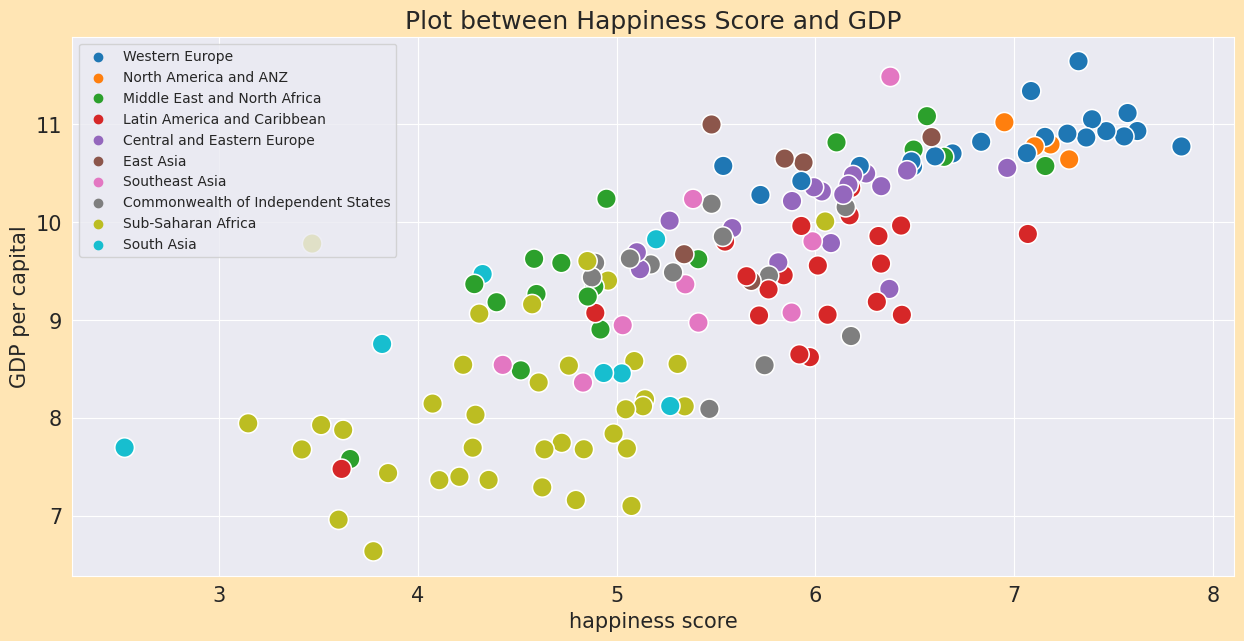

In [10]:
from seaborn._core.properties import FontSize
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df['Happiness score'], y=happy_df['GDP'], hue=happy_df['RI'], s=200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('happiness score')
plt.ylabel('GDP per capital')


Text(0, 0.5, '')

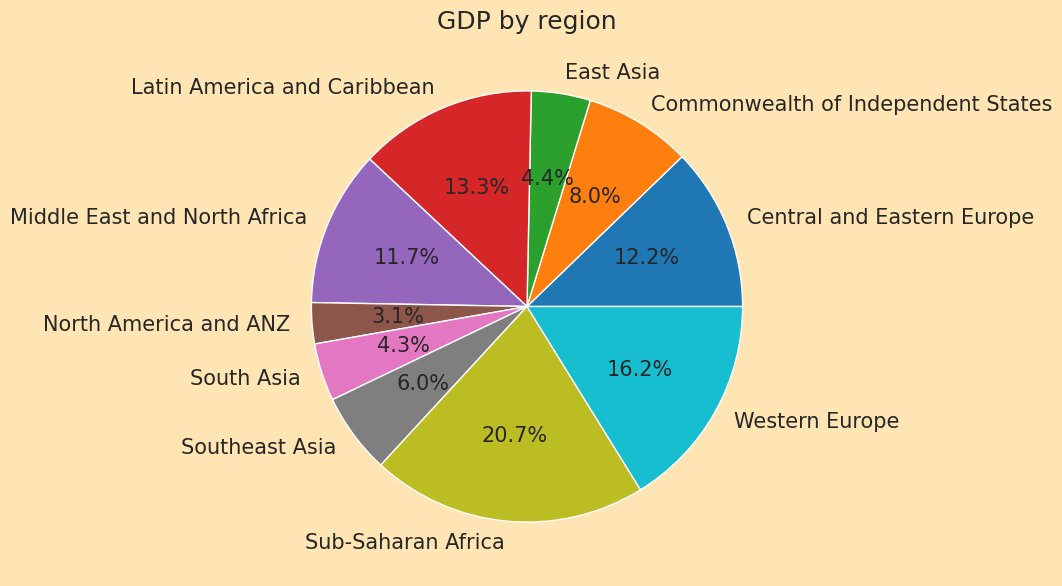

In [11]:
gdp_region = happy_df.groupby('RI')['GDP'].sum()
gdp_region
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by region')
plt.ylabel('')

In [12]:
total_country = happy_df.groupby('RI')[['country']].count()
print(total_country)

                                    country
RI                                         
Central and Eastern Europe               17
Commonwealth of Independent States       12
East Asia                                 6
Latin America and Caribbean              20
Middle East and North Africa             17
North America and ANZ                     4
South Asia                                7
Southeast Asia                            9
Sub-Saharan Africa                       36
Western Europe                           21


<ipython-input-13-d22a37657c58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = happy_df.corr(method = "pearson")
<ipython-input-13-d22a37657c58>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor,dtype=np.bool),cmap = "Reds",square = True,ax = ax)


<Axes: >

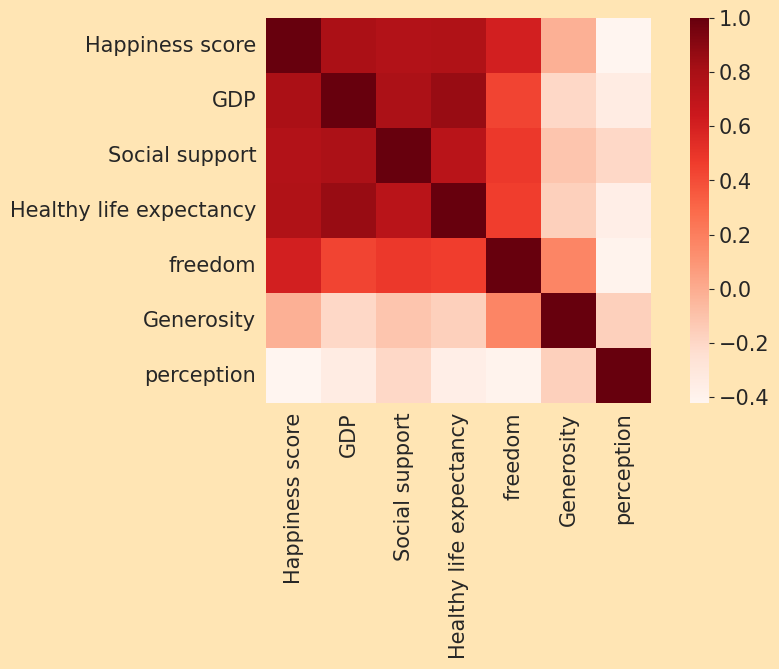

In [13]:
cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor,dtype=np.bool),cmap = "Reds",square = True,ax = ax)

<BarContainer object of 10 artists>

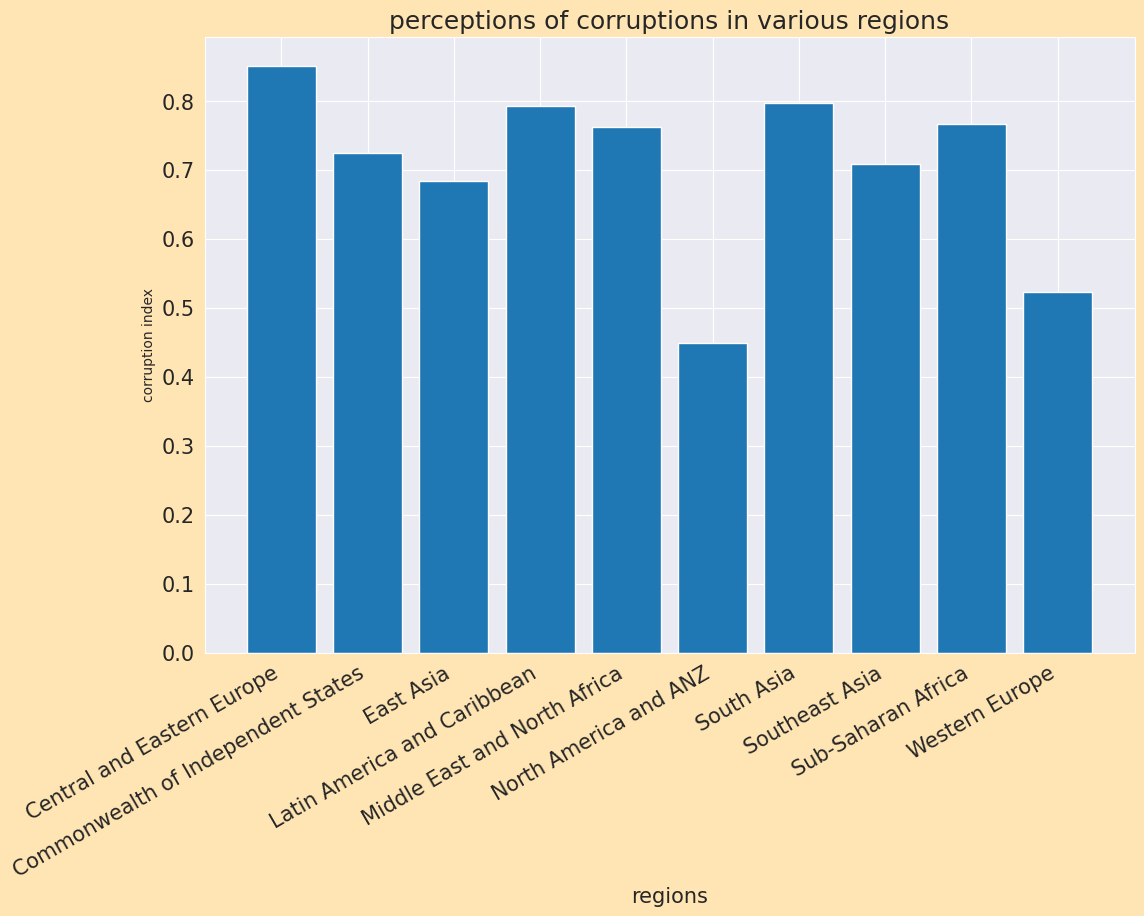

In [14]:
corruption = happy_df.groupby('RI')[['perception']].mean()
corruption
plt.rcParams['figure.figsize']=(12,8)
plt.title("perceptions of corruptions in various regions")
plt.xlabel("regions", fontsize = 15)
plt.ylabel("corruption index", fontsize = 10)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index,corruption.perception)

In [15]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<ipython-input-16-e4b30b7e1a5c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation = 45,ha = "right")
<ipython-input-16-e4b30b7e1a5c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation = 45,ha = "right")


Text(827.8358585858584, 0.5, 'lifeexpectancy')

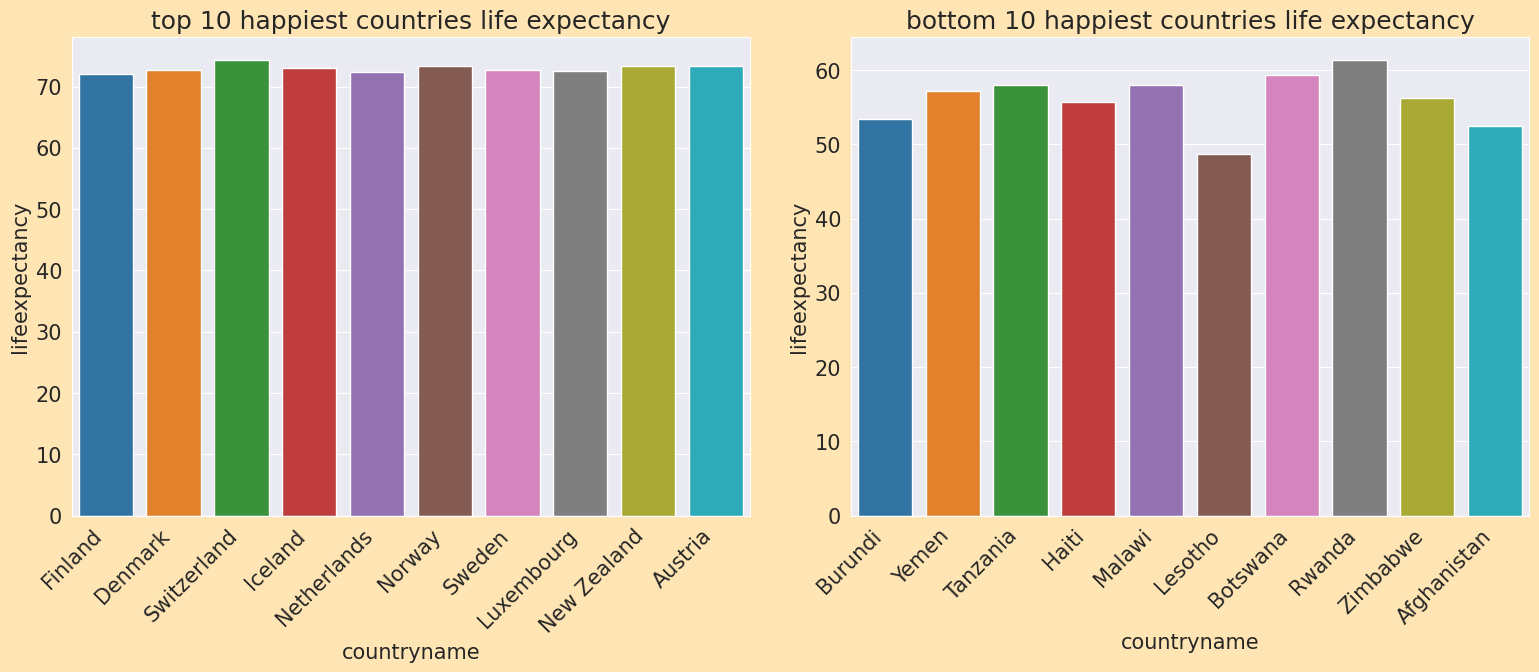

In [16]:
fig, axes = plt.subplots(1,2,figsize =(16,6))
plt.tight_layout(pad =2)
xlabels = top_10.country
axes[0].set_title("top 10 happiest countries life expectancy")
axes[0].set_xticklabels(xlabels,rotation = 45,ha = "right")
sns.barplot(x=top_10.country, y=top_10['Healthy life expectancy'], ax=axes[0])
axes[0].set_xlabel('countryname')
axes[0].set_ylabel('lifeexpectancy')
xlabels = bottom_10.country
axes[1].set_title("bottom 10 happiest countries life expectancy")
axes[1].set_xticklabels(xlabels,rotation = 45,ha = "right")
sns.barplot(x = bottom_10.country, y = bottom_10['Healthy life expectancy'], ax=axes[1])
axes[1].set_xlabel('countryname')
axes[1].set_ylabel('lifeexpectancy')

Text(0, 0.5, 'happiness score')

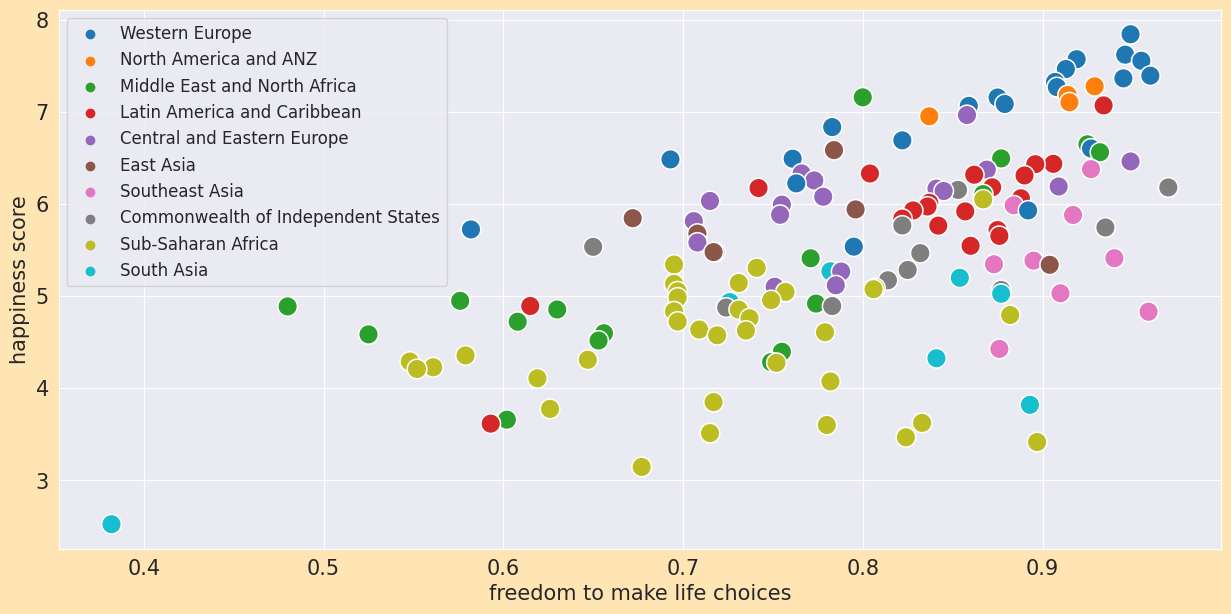

In [17]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x=happy_df['freedom'], y=happy_df['Happiness score'], hue=happy_df['RI'], s=200)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("freedom to make life choices")
plt.ylabel("happiness score")


<BarContainer object of 10 artists>

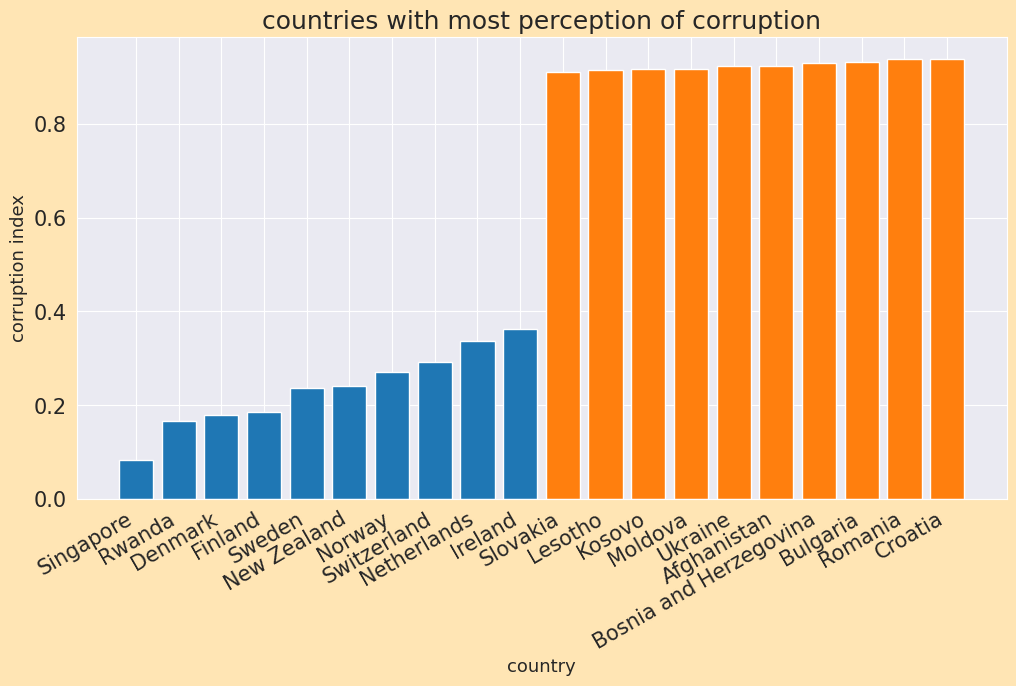

In [18]:
country = happy_df.sort_values(by = 'perception').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('countries with most perception of corruption')
plt.xlabel('country', fontsize = 13)
plt.ylabel('corruption index', fontsize =13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country, country.perception)
country = happy_df.sort_values(by = 'perception').tail(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('countries with most perception of corruption')
plt.xlabel('country', fontsize = 13)
plt.ylabel('corruption index', fontsize =13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country, country.perception)

Text(0, 0.5, 'Happiness score')

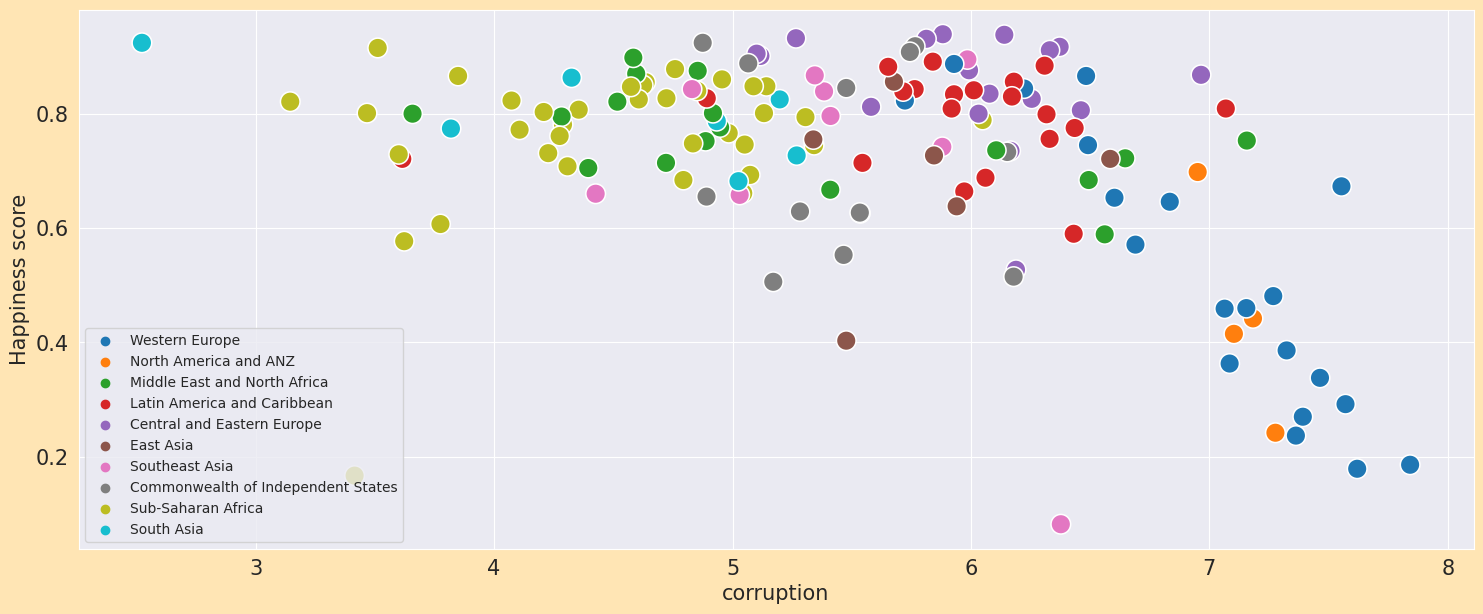

In [19]:
plt.rcParams['figure.figsize'] = (18,7)
sns.scatterplot(x = happy_df['Happiness score'], y = happy_df['perception'], hue = happy_df['RI'], s =200)
plt.legend(loc='lower left', fontsize=10)
plt.xlabel('corruption')
plt.ylabel('Happiness score')